In [1]:
from pymongo import MongoClient
import gensim 
import pandas as pd  
import numpy as np 


client = MongoClient('localhost', 27017)
db = client['']

tweets = pd.DataFrame(list(db[''].find()))

data = pd.DataFrame(columns=['Tweets'])
data['Tweets'] = tweets['text']
data['Id'] = tweets['_id']
data['len']  = np.array([len(tweet) for tweet in data['Tweets']])
user = list()
for i in range(0,len(tweets)):
    user.append(tweets['user'][i]['name'])
data['user'] = np.array(user)

In [2]:
from utils import tokenize_and_stem

docs = data['Tweets']

documents = [tokenize_and_stem(s) for s in docs]

In [3]:
print(documents[:1])

[['ciao', 'ragazzi', 'dopo', 'tanto', 'tempo', 'torno', 'fort', 'inizieremo', 'questo', 'week', 'postar', 'pronostici', 'vincer', 'presto', 'mister']]


In [4]:
#train model

In [5]:
from gensim.models.word2vec import Word2Vec

# build vocabulary and train model
model = gensim.models.Word2Vec(
        documents,
        size=300,
        window=2,
        min_count=2,
        workers=10)

model.train(documents, total_examples=len(documents), epochs=10)

(1716157, 2149080)

In [10]:
# model.save("w2v.model")
# print("Model Saved")

Model Saved


In [6]:
X = model[model.wv.vocab]

/media/alessandro/storage/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [7]:
#Kmeans

Counter({4: 9672, 0: 3908, 3: 1448, 5: 604, 2: 468, 1: 167})
silhouette score:  0.47913548


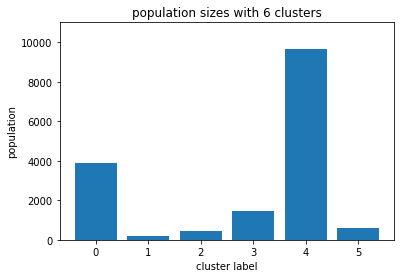

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import collections
 
k=6

kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
silhouette_score = silhouette_score(X, labels, metric='euclidean')

plt.bar(range(len(set(labels))), np.bincount(labels))

plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('population sizes with {} clusters'.format(k));

# truncate y axis to see the rest better
plt.ylim(0,11000);

print (collections.Counter(labels))
print ('silhouette score: ', silhouette_score)